<a href="https://colab.research.google.com/github/Magguire/K-Nearest-Neighbors-Image-Classifier/blob/master/module_2_core_week_IV_ip_naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spam Classification Using Naive Bayes Classifier

### <b>Overview</b> 

#### <u>Spambase Documentation</u>

The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...

Our collection of spam e-mails came from our postmaster and individuals who had filed spam. Our collection of non-spam e-mails came from filed work and personal e-mails, and hence the word 'george' and the area code '650' are indicators of non-spam. These are useful when constructing a personalized spam filter. One would either have to blind such non-spam indicators or get a very wide collection of non-spam to generate a general purpose spam filter.

## 1. Defining the Question

### a) Specifying the Question

We need to perform predicitve analysis on a dataset in order to find out whether an email is spam or not based on several characteristics.

### b) Defining the Metric for Success

The metric for success is to build an optimized Naive Bayes classification model which best predicts whether an email is spam or not. This will be validated by using different train and test sizes for checking accuracy performance of the model and using at least one optimization technique. 

### c) Understanding the context 

 This dataset was collected for emails on whether they are spam or not. We need to depermine which kind of emails are likely to be spam. 

### d) Recording the Experimental Design

Experimental Procedure:

1. Load the dataset.
2. Check the data.
3. Perform data cleaning.
4. Implement solution.
   - Randomly partition the dataset into two parts i.e 80 - 20  sets.
   - Build Gaussian Naive Bayes classifier model.
   - Compute the accuracy (percentage of correct classification).
   - Report the confusion matrix of the classifier.
   - Repeat step 2 to step 4 twice, each time splitting the datasets differently i.e. 70-30, 60-40, then note the outcomes of your modeling.
   - Suggest and apply at least one of the optimization techniques that you learned earlier this week.
5. Provide further recommendations to improve the classifier.  
6. Challenge your solution by providing insights on how you can make improvements in model improvement.
7. Conclusion  

### e) Data Relevance

The dataset contains information about emails that were sent and a value representing whether the email is spam or not. 
- spam = 1
- not spam = 0

## 2. Reading the Data

In [5]:
# Loading the Dataset
# url = https://archive.ics.uci.edu/ml/datasets/Spambase
import pandas as pd
import numpy as np

df = pd.read_csv('/content/spambase.data', header=None)

## 3. Checking the Data

In [6]:
# Determining the no. of records in our dataset
# 
df.shape

(4601, 58)

The train dataset contains 4601 email records and 58 columns.

In [7]:
# Previewing the top of our dataset
#
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


The last column denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. 

In [8]:
# Previewing the bottom of our dataset
# 
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,...,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,...,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [9]:
# Checking whether each column has an appropriate datatype
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4601 non-null   float64
 1   1       4601 non-null   float64
 2   2       4601 non-null   float64
 3   3       4601 non-null   float64
 4   4       4601 non-null   float64
 5   5       4601 non-null   float64
 6   6       4601 non-null   float64
 7   7       4601 non-null   float64
 8   8       4601 non-null   float64
 9   9       4601 non-null   float64
 10  10      4601 non-null   float64
 11  11      4601 non-null   float64
 12  12      4601 non-null   float64
 13  13      4601 non-null   float64
 14  14      4601 non-null   float64
 15  15      4601 non-null   float64
 16  16      4601 non-null   float64
 17  17      4601 non-null   float64
 18  18      4601 non-null   float64
 19  19      4601 non-null   float64
 20  20      4601 non-null   float64
 21  21      4601 non-null   float64
 22  

## 4. Tidying the Dataset

In [10]:
# Identifying the Missing Data
#
df.isnull().sum()

# There are no mising values

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    0
dtype: int64

In [11]:
# check uniformity in columns
df.columns 

# let's rename columns into xs and y in order to have more meaningful column names

df.columns =[('x'+str(i)) for i in range(1,59)]
df.columns

# rename last column to y(independent variable)
df.rename(columns={'x58':'y'}, inplace=True)
df.columns

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21',
       'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31',
       'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41',
       'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51',
       'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'y'],
      dtype='object')

In [12]:
# check for duplicates

df.duplicated().sum()

391

In [13]:
# drop duplicates

df.drop_duplicates(inplace=True)

# check for duplicates again
df.duplicated().sum()

0

## 5. Exploratory Analysis

In [14]:
# Ploting the univariate summaries and recording our observations
#
df.describe(include='all')

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x49,x50,x51,x52,x53,x54,x55,x56,x57,y
count,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,...,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000
mean,0.104366,0.112656,0.291473,0.063078,0.325321,0.096656,0.117475,0.108000,0.091860,0.248420,...,0.040403,0.144048,0.017376,0.281136,0.076057,0.045798,5.383896,52.139905,291.181948,0.398812
std,0.300005,0.454260,0.515719,1.352487,0.687805,0.276030,0.397284,0.410282,0.282144,0.656638,...,0.252533,0.274256,0.105731,0.843321,0.239708,0.435925,33.147358,199.582168,618.654838,0.489712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627500,7.000000,40.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.073000,0.000000,0.016000,0.000000,0.000000,2.297000,15.000000,101.500000,0.000000
75%,0.000000,0.000000,0.440000,0.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.190000,...,0.000000,0.194000,0.000000,0.331000,0.053000,0.000000,3.706750,44.000000,273.750000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


## 6. Implementing the Solution

### Naive Bayes Classifier model

Since we only have two classes in our dataset, that is, either spam or not spam, the Gaussian Naive Bayes classifier model would best fit the problem.

This model makes an assumption that the data is normally distributed. 

In [22]:
# split data into dependent and independent variables
X = df.drop('y', axis=1) 
y = df['y']

# split our dependent and independent variables into train and test data randomly
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# build GaussianNB classifier model
from sklearn.naive_bayes import GaussianNB
 
# create classifier object
model = GaussianNB()
 
# fit the classifier with x and y data
model.fit(X_train, y_train) 

# predict
y_pred = model.predict(X_test)

# evaluate results

from sklearn.metrics import accuracy_score, confusion_matrix

print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[357 138]
 [ 13 334]]
0.8206650831353919


The model above is our baseline Naive Bayes model. The model gives 82.06% accuracy.

In [23]:
# build Naive Bayes model for different train and test sizes

# create a list of different test sizes
test = [0.3, 0.4]

# create loop to perform knn twice for different test sizes.

for size in test:
    
    # split our dependent and independent variables into train and test data

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=0)

    # create classifier object
    model = GaussianNB()
 
    # fit the classifier with x and y data
    model.fit(X_train, y_train) 

    # predict
    y_pred = model.predict(X_test)

    # evaluate results

    from sklearn.metrics import accuracy_score, confusion_matrix

    print(confusion_matrix(y_test,y_pred))
    print(accuracy_score(y_test,y_pred))

    print('##################################################################')

[[541 196]
 [ 14 512]]
0.833729216152019
##################################################################
[[735 259]
 [ 24 666]]
0.8319477434679335
##################################################################


Using different train/test sizes:
- 70/30 results in a better accuracy value of 83.37%.
- 60/40 results in a better accuracy value of 83.19%.

We shall now use a train_test size of 70/30.

### Improving the model

This could be done by:
* Removing correlated features
* Using log probabilities in calculations
* Eliminating the zero observations (laplace smoothing operator)
* Handling continuous variables/ normalize the dataset.
* Handling text data
* Retraining the model with new data
* Parallelizing calculations

Let's check for correlated variables and drop these in an attempt to improve our model's performance.

For a start, let us drop correlated variables of value 0.6 and above.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.


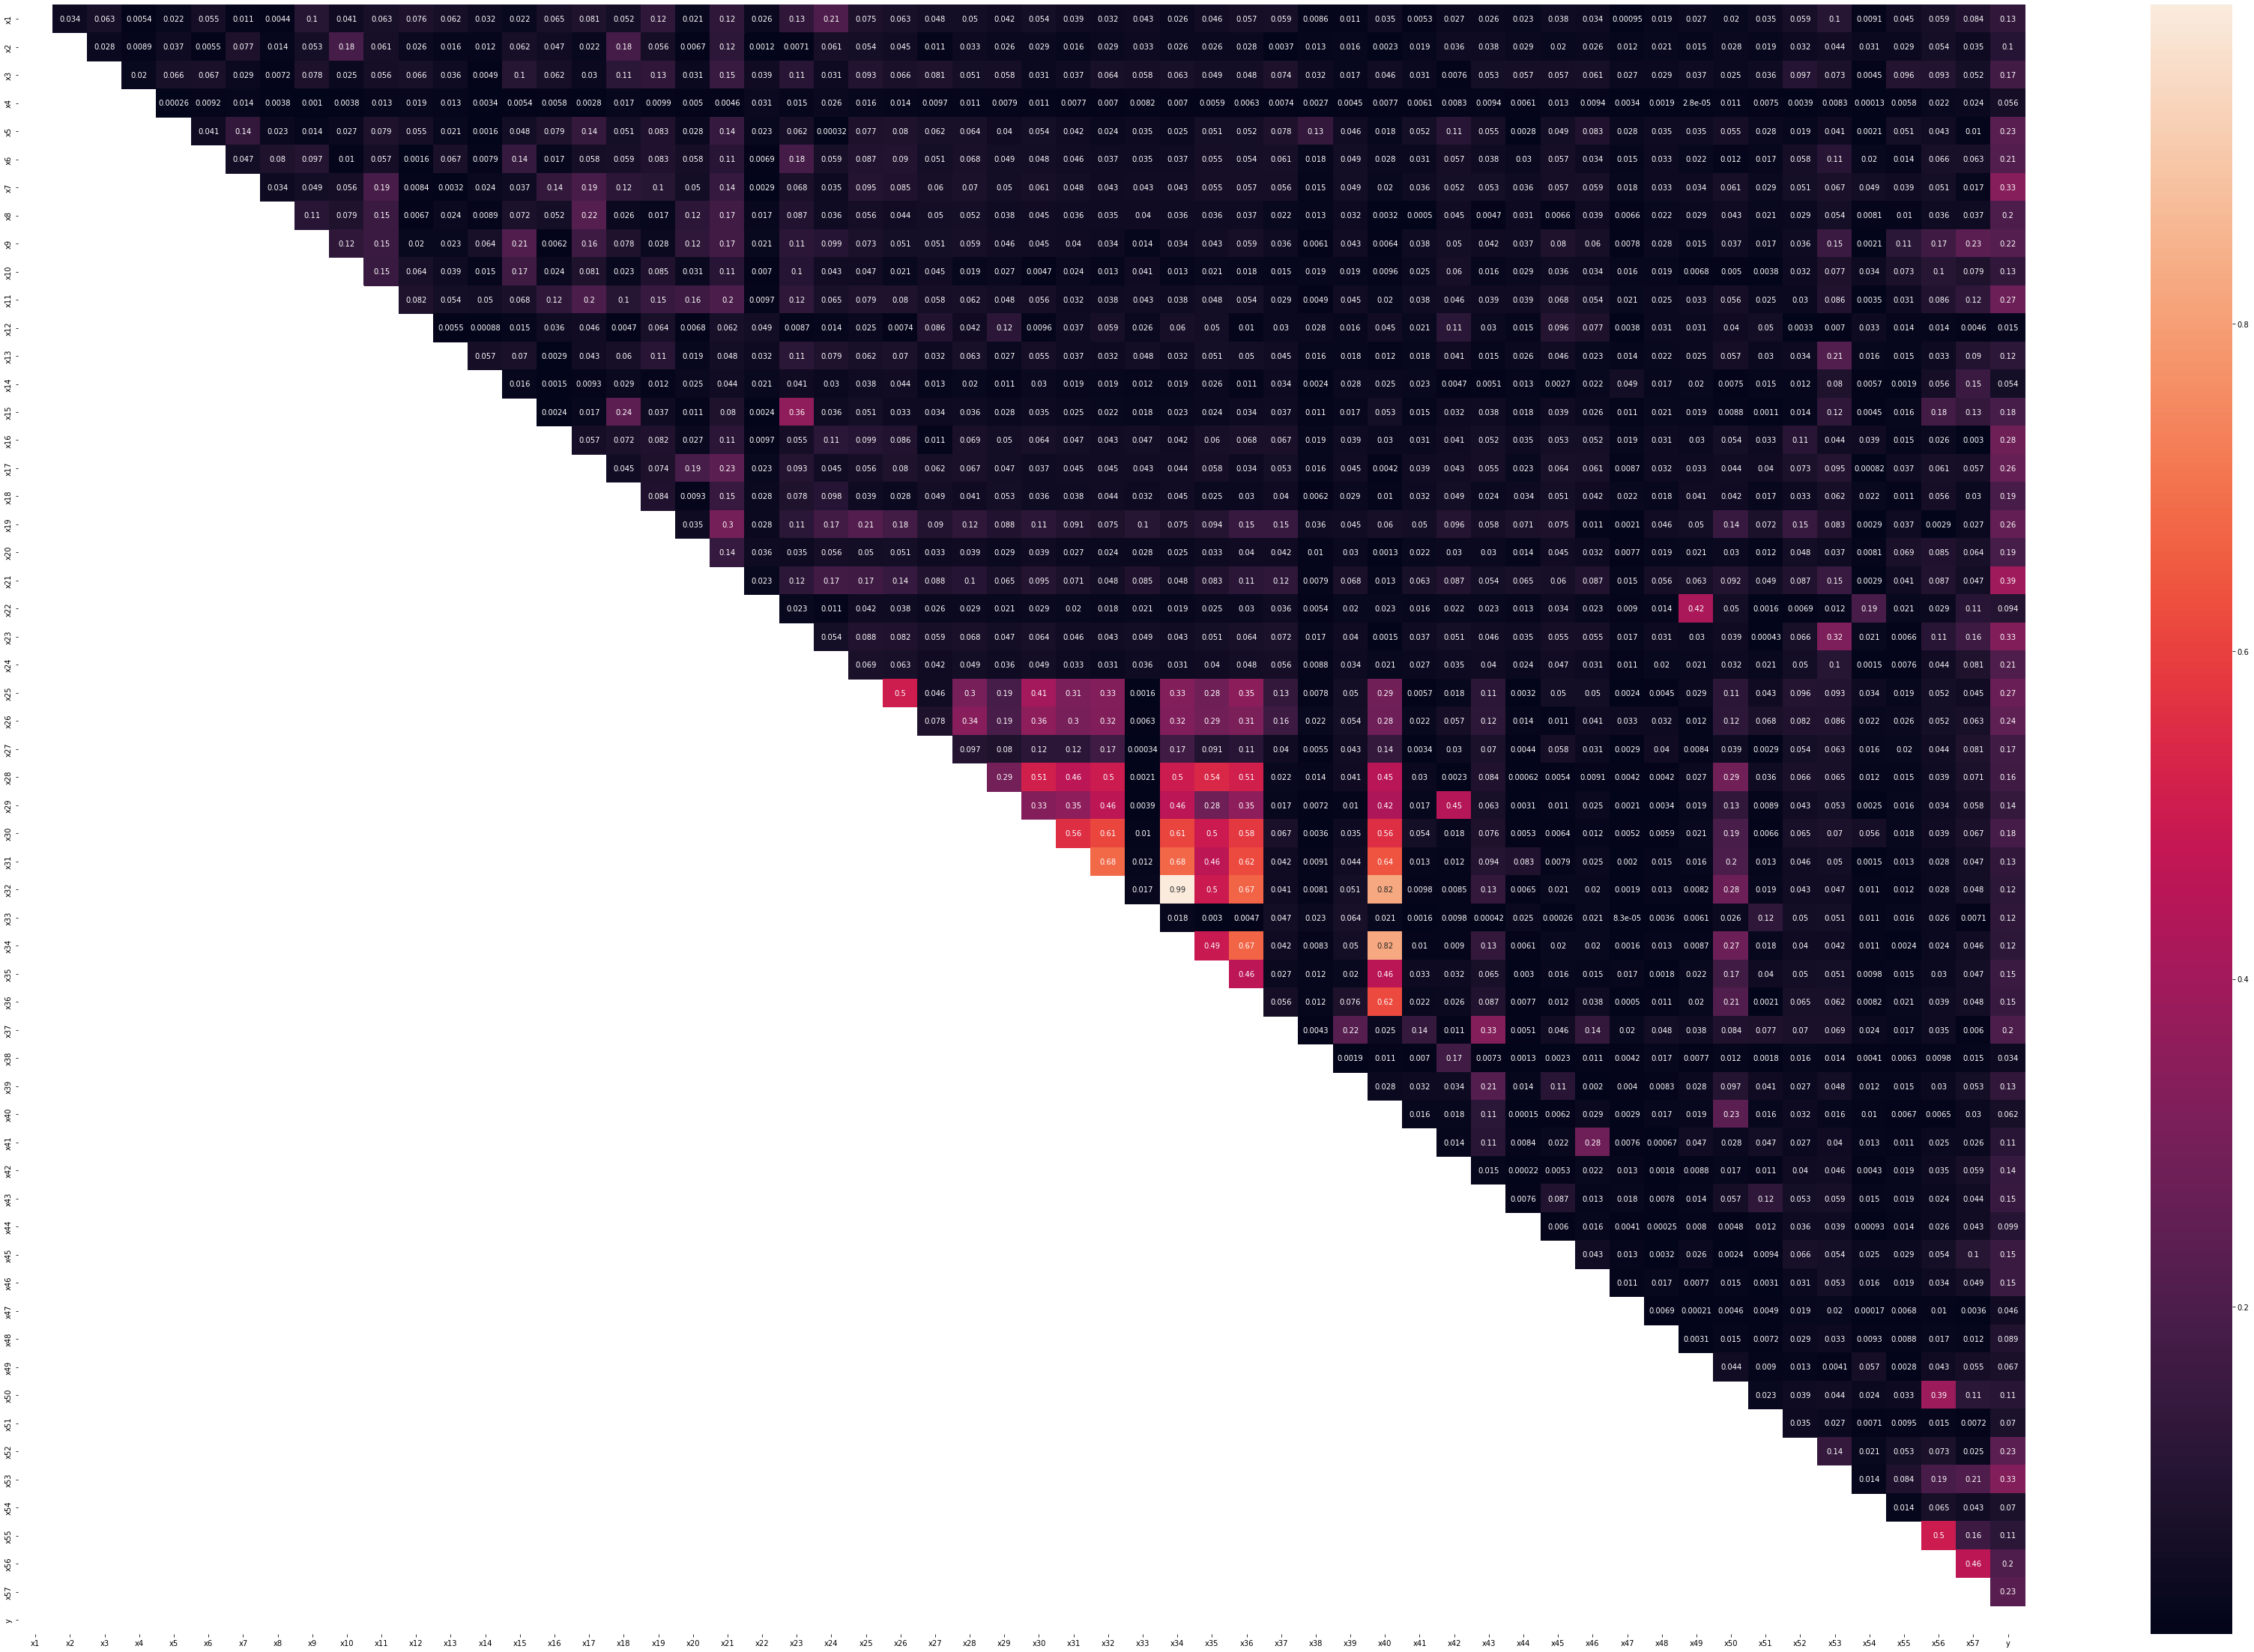

In [24]:
# correlation 

import matplotlib.pyplot as plt
import seaborn as sns

correlation = df.corr().abs()

# show only upper triangular matrix for correlation

upper_tri = correlation.where(np.triu(np.ones(correlation.shape),k=1).astype(np.bool))

plt.figure(figsize=(60,40))
sns.heatmap(upper_tri, annot=True)

In [32]:
# Create a list of columns with correlation value greater than 0.6

drop_columns = [column for column in upper_tri.columns if any(upper_tri[column] > 0.6)]
print() 
print(drop_columns)



['x32', 'x34', 'x36', 'x40']


In [33]:
# create dataframe with the column to drop

df1 = df.drop(drop_columns, axis=1)

In [34]:
# repeat modelling process 

# split data into dependent and independent variables
X = df1.drop('y', axis=1) 
y = df1['y']

# split our dependent and independent variables into train and test data randomly

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# build GaussianNB classifier model
from sklearn.naive_bayes import GaussianNB
 
# create classifier object
model = GaussianNB()
 
# fit the classifier with x and y data
model.fit(X_train, y_train) 

# predict
y_pred = model.predict(X_test)

# evaluate results

print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[546 191]
 [ 15 511]]
0.8368962787015044


The accuracy of the model improves slightly to 83.68% when correlated values of greater than 0.6 are dropped. 

## 8. Recommendations



Our model's performance after optimization is fairly good enough. It is unfortunate that hyperparameter tuning cannot improve our model.

However, we would like to further improve our model by implementing laplace smoothing inorder to handle the zero probabilities. We would need to tune the alpha parameter in order to further improve the model.

## 9. Conclusion

We get reliable results when we use Gaussian Naive Bayes classifier model.

We will however need to build other classification models and compare accuracy results to determine which classification model best suits our problem.